In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def convert_bgr2gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def denoise(gray):
    return cv2.medianBlur(gray, 3)

In [3]:
def display(image, gray=False):
    # Display it
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()  

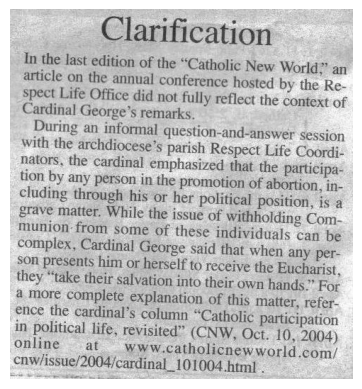

In [4]:
image = cv2.imread('./data/samples/skewed_image.png')
display(image)

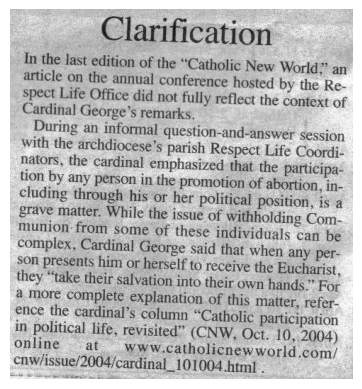

In [5]:
gray = convert_bgr2gray(image)
display(gray, True)

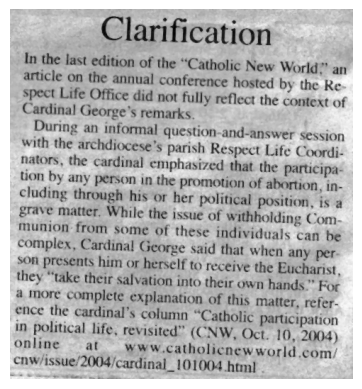

In [6]:
denoised = denoise(gray)
display(denoised, True)

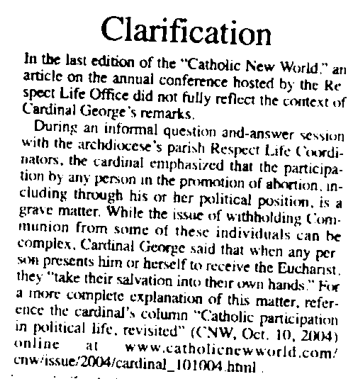

In [7]:
def binarize(gray):
    # thres, img = cv2.threshold(gray, 210, 230, cv2.THRESH_BINARY)
    # img = cv2.adaptiveThreshold(
    #     gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    #     cv2.THRESH_BINARY, 11, 2
    # )
    _, img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return img

binary = binarize(denoised)
display(binary, True)

In [8]:
from deskew import determine_skew
def deskew(image):
    angle = determine_skew(image)
    
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
    
deskewed = deskew(binary)

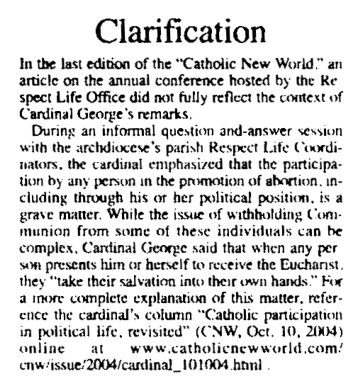

In [10]:
display(deskewed, True)